# Prediction of Heart disease using Machine Learning Algorithm 

Cardiovascular diseases (CVD) have now become the leading cause of mortality in India. 

A quarter of all mortality is attributable to CVD.<br>
Ischemic heart disease and stroke are the predominant causes and are responsible for more than 82% of CVD deaths.

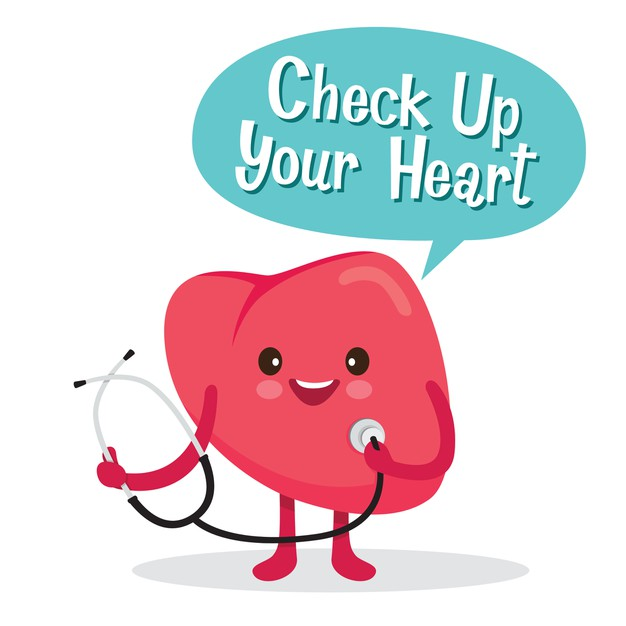



---

While you can't change some risk factors — such as family history, sex or age<br>
But still there are plenty of ways you can reduce your risk of heart disease.

#### 1. Take control of your blood Pressure
#### 2. Take a note on your Cholestrol
#### 3. Take care of your eating habits.
#### 4. Exercise is a must
#### 5. Quit smoking, if you do
#### 6. Try avoidin getting diabetes
#### 7. A good night sleep will do no much harm.

--- 

In [1]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline

In [4]:
# Reading the dataset from kaggle
df = pd.read_csv('suffering from heart disease.csv')

In [5]:
df.head()

,age,sex,chestPain,restBP,cholestrol,bloodSugar,restECG,maxHeartRate,anginaPain,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


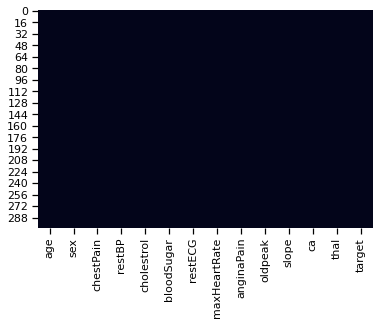

In [65]:
# Checking for null values
sns.heatmap(df.isnull(), cbar=False)
sns.set_context('talk')

So, we can see, this dataset does not have any null values !

### *Visualizing the Risk Factor - AGE*

Text(0.5, 1.0, 'Age Factor: Risk in People , Male-1, Female-0')

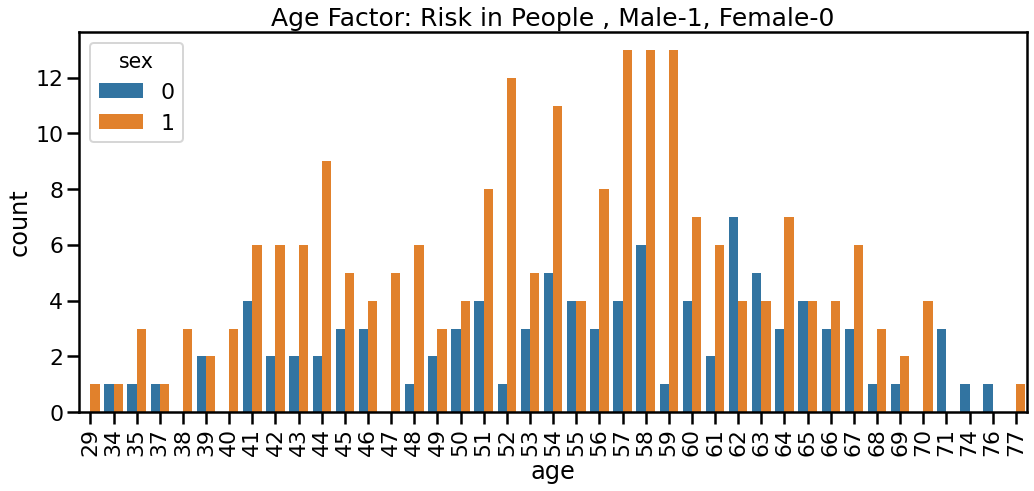

In [59]:
plt.figure(figsize=(17,7))
sns.set_context('poster')
g= sns.countplot("age", data=df ,hue = 'sex',)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Age Factor: Risk in People , Male-1, Female-0', size =25)

### _No. of people having heart disease in this dataset_

Text(0.5, 1.0, 'No. of people having heart disease')

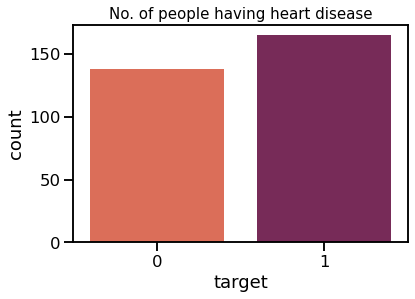

In [67]:
sns.countplot(x='target',data=df, palette='rocket_r')
sns.set_context('poster')
plt.title("No. of people having heart disease", size =15)

- 0- He/She is Safe
- 1- Having a Heart Disease

### _Finding Correlation_

In [19]:
df.describe()

,age,sex,chestPain,restBP,cholestrol,bloodSugar,restECG,maxHeartRate,anginaPain,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [22]:
corrmat = df.corr()
top_corr_features = corrmat.index

### _Using this Correlation to visualize through a Heatmap_

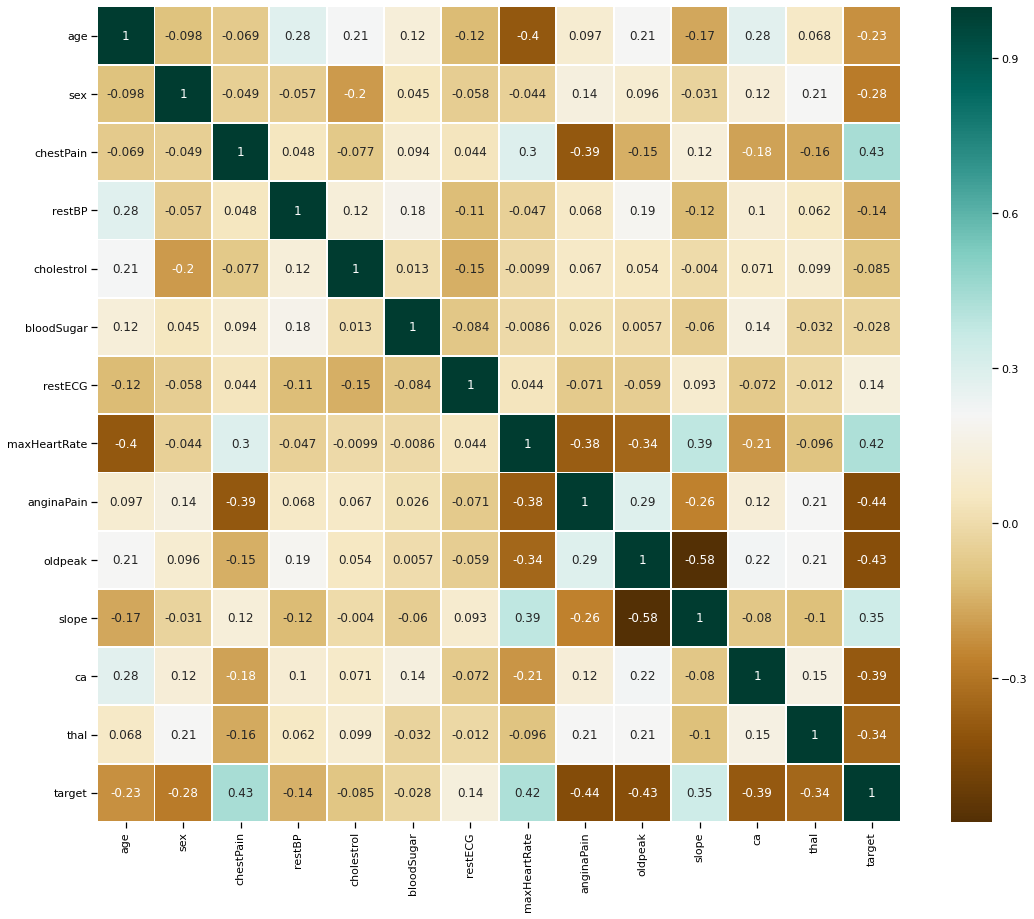

In [71]:
plt.figure(figsize=(18,15))
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="BrBG", linewidths=.9)

##### Including dummy variables

In [73]:
dataset = pd.get_dummies(df, columns = ['sex', 'chestPain', 'bloodSugar', 'restECG', 'anginaPain', 'slope', 'ca', 'thal'])

#### *Scaling*

In [74]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
scaleit = ['age', 'restBP', 'cholestrol', 'maxHeartRate', 'oldpeak']
dataset[scaleit] = standardScaler.fit_transform(dataset[scaleit])

In [76]:
dataset.head()

,age,restBP,cholestrol,maxHeartRate,oldpeak,target,sex_0,sex_1,chestPain_0,chestPain_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


## _Independent and dependent features_

In [77]:
y = dataset['target'] 
X = dataset.drop(['target'], axis = 1)

## Using Random Forest Classifier

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)

In [116]:
from sklearn.model_selection import cross_val_score
rscore=cross_val_score(randomforest_classifier,X,y,cv=10)

In [117]:
rscore

array([0.93548387, 0.80645161, 0.83870968, 0.9       , 0.83333333,
       0.73333333, 0.7       , 0.83333333, 0.73333333, 0.8       ])

In [118]:
rscore.mean()

0.8113978494623655

---

### `Now for improving the score: `

## Using K-Nearest Neighbour  Classifier

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
from sklearn.model_selection import cross_val_score
knn_scores = []

for k in range(1,25):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

In [114]:
knn_scores

[0.7455913978494624,
 0.7591397849462365,
 0.8120430107526883,
 0.8053763440860215,
 0.8348387096774192,
 0.831505376344086,
 0.8416129032258064,
 0.8417204301075267,
 0.8449462365591398,
 0.8448387096774193,
 0.8381720430107527,
 0.8448387096774195,
 0.841505376344086,
 0.8415053763440861,
 0.8280645161290323,
 0.8381720430107527,
 0.8280645161290323,
 0.8249462365591398,
 0.821505376344086,
 0.8250537634408601,
 0.8349462365591398,
 0.828494623655914,
 0.8283870967741935,
 0.828494623655914]

### Plotting the classification scores

D:\Software\Anaconda Ankur\Files\lib\site-packages\ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


([<matplotlib.axis.XTick at 0x18fab1fde48>,
 <a list of 24 Text major ticklabel objects>)

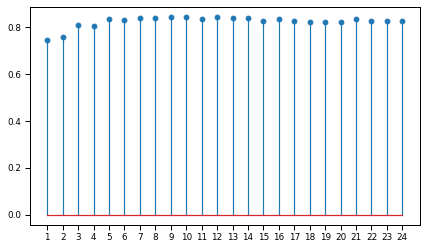

In [101]:
plt.figure(figsize=(7,4))

plt.stem([k for k in range(1, 25)], knn_scores,)
plt.xticks([i for i in range(1, 25)])

### The Predicted Score of KNN 

In [112]:
knn_classifier = KNeighborsClassifier(n_neighbors = 9)
score=cross_val_score(knn_classifier,X,y,cv=10)

In [113]:
score.mean()

0.8449462365591398

### `Thus, the value of score increased when we used`: <br> 
## K nearest Classifier! 

---